Model Accuracy: 0.6536796536796536


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


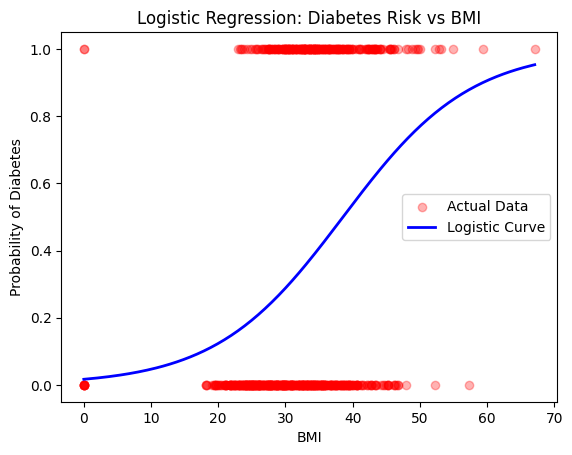

In [ ]:
# Scenario 🏥
# A hospital wants to predict whether patients are at risk of developing diabetes based on their BMI (Body Mass Index). They collect data from 10 patients,
#  recording BMI values and whether the patient was diagnosed with diabetes (1 = diabetes, 0 = no diabetes).

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load data
data = pd.read_csv("/content/diabetes.csv")

# Feature and target
X = data[['BMI']]
y = data['Outcome']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# Train model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Model Accuracy:", accuracy)

# Create smooth BMI range
X_range = np.linspace(X['BMI'].min(), X['BMI'].max(), 200).reshape(-1,1)

# Predict probabilities
y_prob = model.predict_proba(X_range)[:,1]

# Plot
plt.scatter(X, y, color='red', alpha=0.3, label="Actual Data")
plt.plot(X_range, y_prob, color='blue', linewidth=2, label="Logistic Curve")

plt.xlabel("BMI")
plt.ylabel("Probability of Diabetes")
plt.title("Logistic Regression: Diabetes Risk vs BMI")
plt.legend()
plt.show()

